Используя набор данных IMDB сделано:
1. Спроектировать модель классификации отзывов к фильмам с точностью на валидационной выборке более 80%.
2. Показать, что модель способна классифицировать отзывы с вероятностью более 88% на контрольной выборке.

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Загрузка данных
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# Вывод размеров полученных наборов данных
print("Размеры тренировочной выборки:", len(train_data))
print("Размеры проверочной выборки:", len(test_data))

Размеры тренировочной выборки: 25000
Размеры проверочной выборки: 25000


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
import keras
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras import regularizers

# Определим раннюю остановку
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model = models.Sequential()
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.02), input_shape=(10000,)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

EPOCHS = 30
BATCH_SIZE = 256


model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/30
88/88 [==============================] - 6s 47ms/step - loss: 138.6627 - accuracy: 0.5090 - val_loss: 82.3260 - val_accuracy: 0.5788
Epoch 2/30
88/88 [==============================] - 3s 39ms/step - loss: 53.5645 - accuracy: 0.5252 - val_loss: 32.3584 - val_accuracy: 0.7548
Epoch 3/30
88/88 [==============================] - 4s 42ms/step - loss: 21.7510 - accuracy: 0.5634 - val_loss: 13.8610 - val_accuracy: 0.7348
Epoch 4/30
88/88 [==============================] - 3s 39ms/step - loss: 9.7499 - accuracy: 0.6479 - val_loss: 6.5962 - val_accuracy: 0.7588
Epoch 5/30
88/88 [==============================] - 3s 39ms/step - loss: 4.8487 - accuracy: 0.7474 - val_loss: 3.4596 - val_accuracy: 0.8036
Epoch 6/30
88/88 [==============================] - 4s 42ms/step - loss: 2.6158 - accuracy: 0.8255 - val_loss: 1.9048 - val_accuracy: 0.8656
Epoch 7/30
88/88 [==============================] - 4s 40ms/step - loss: 1.5769 - accuracy: 0.8692 - val_loss: 1.2719 - val_accuracy: 0.8756
Epoch 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

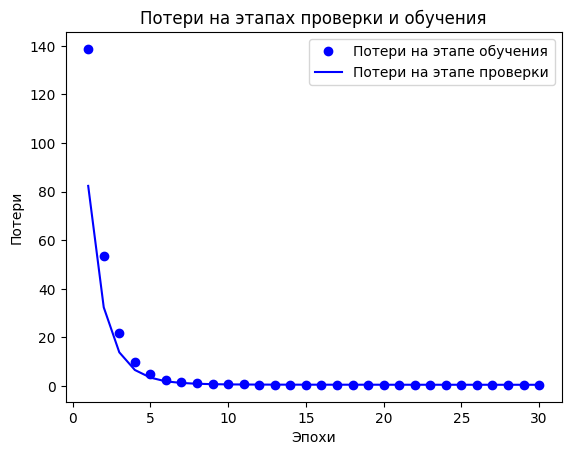

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

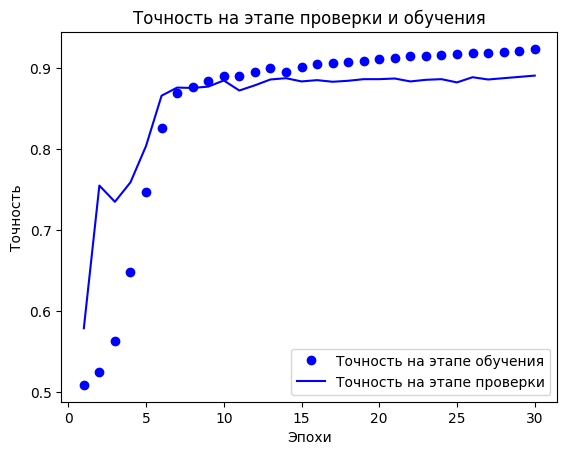

In [ ]:
plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

782/782 [==============================] - 3s 4ms/step - loss: 0.5203 - accuracy: 0.8825
Доля верных ответов на тестовых данных, в процентах: 88.248
